In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


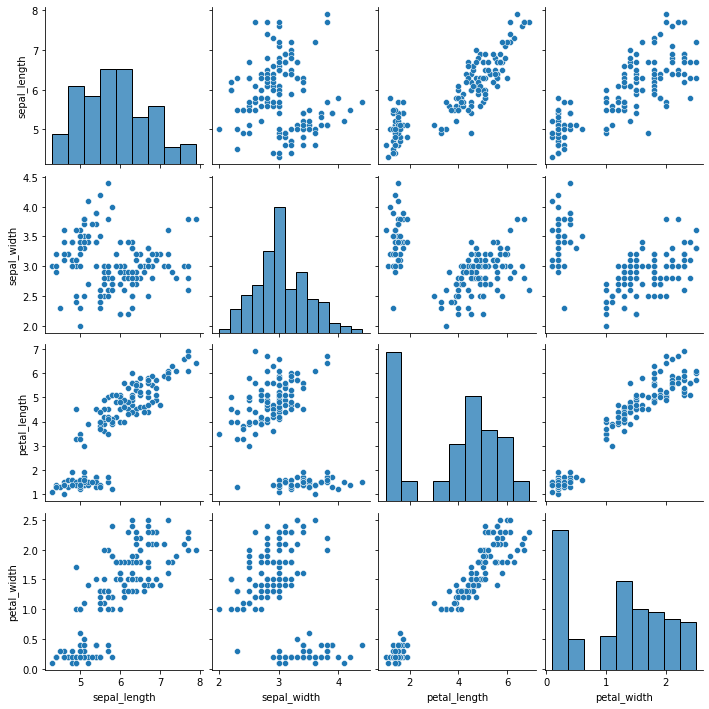

In [6]:
sns.pairplot(df);

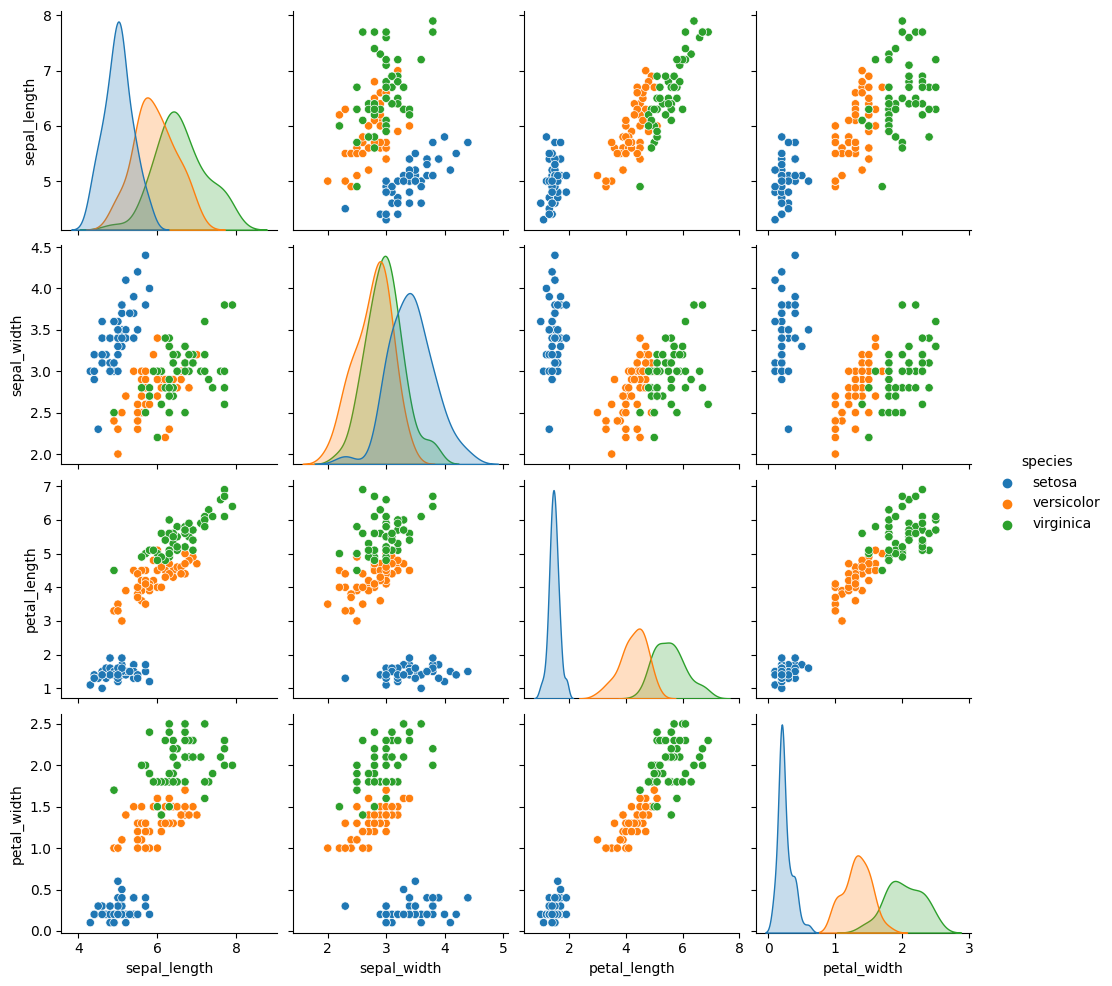

In [7]:
sns.pairplot(data=df, hue="species"); # Not looks bad. It can be clustered good I think.

## Scaling

In [ ]:
# Actually we need scaling while Kmeans Clustering but we don't for that data.

## Lets copy out labeled data, then we drop our target feature

In [10]:
df_copy = df.copy()

In [11]:
df.drop('species' , axis = 1 , inplace=True)

## Modeling

In [9]:
from sklearn.cluster import KMeans

In [12]:
kM = KMeans(n_clusters=5 , random_state = 53)

In [13]:
kM.fit_predict(df) # you can also do kM.fit() and km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 1, 4, 3, 1, 1, 3, 2, 3, 1, 3,
       1, 1, 1, 4, 1, 1, 1, 3, 3, 4, 1, 4, 3, 4, 1, 3, 4, 4, 1, 3, 3, 3,
       1, 4, 4, 3, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4])

In [14]:
kM.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 1, 4, 3, 1, 1, 3, 2, 3, 1, 3,
       1, 1, 1, 4, 1, 1, 1, 3, 3, 4, 1, 4, 3, 4, 1, 3, 4, 4, 1, 3, 3, 3,
       1, 4, 4, 3, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4])

In [19]:
kM.inertia_ # Error metric

46.44618205128205

In [16]:
df['Predicted Classes'] = kM.labels_

In [18]:
df['Predicted Classes'].value_counts()

0    50
4    39
2    25
1    24
3    12
Name: Predicted Classes, dtype: int64

# Choosing The Optimal Number of Clusters

## Elbow metod

In [28]:
ssd = []

K = range(2,10)

for k in K:
    kM = KMeans(n_clusters =k, random_state=53)
    kM.fit(df)
    ssd.append(kM.inertia_)

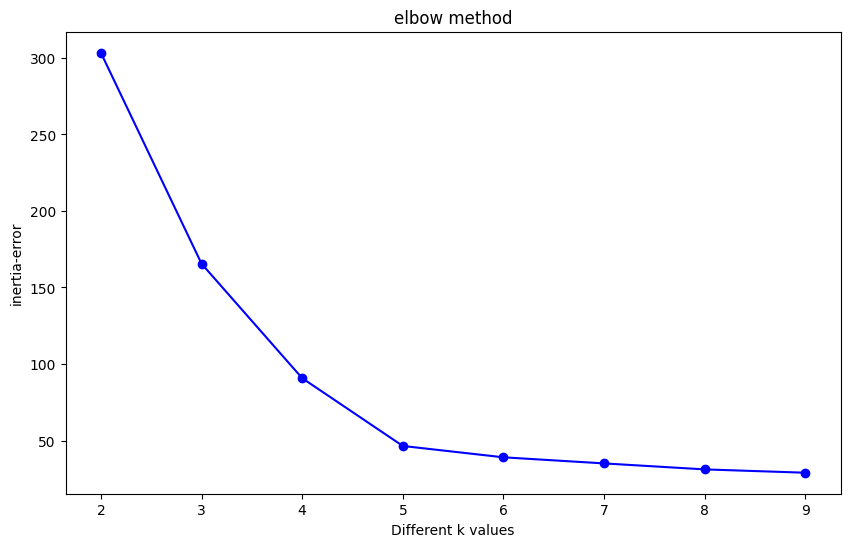

In [29]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [30]:
ssd # 3 or 4 is looking good for clustering.

[303.387,
 165.55352901160464,
 90.75368205128204,
 46.44618205128205,
 39.03998724608725,
 35.04978887325265,
 31.14142257158047,
 28.971440115440117]

In [31]:
pd.Series(ssd).diff()

0           NaN
1   -137.833471
2    -74.799847
3    -44.307500
4     -7.406195
5     -3.990198
6     -3.908366
7     -2.169982
dtype: float64

In [32]:
df_diff =pd.DataFrame(-pd.Series(ssd , name = 'Difference').diff()).rename(index = lambda x : x+2)
df_diff

,Difference
2,NaN
3,137.833471
4,74.799847
5,44.307500
6,7.406195
7,3.990198
8,3.908366
9,2.169982


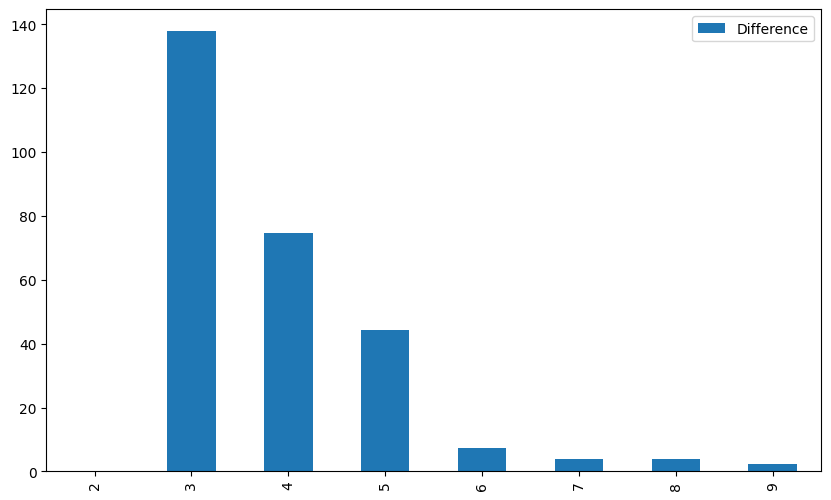

In [33]:
df_diff.plot(kind='bar');

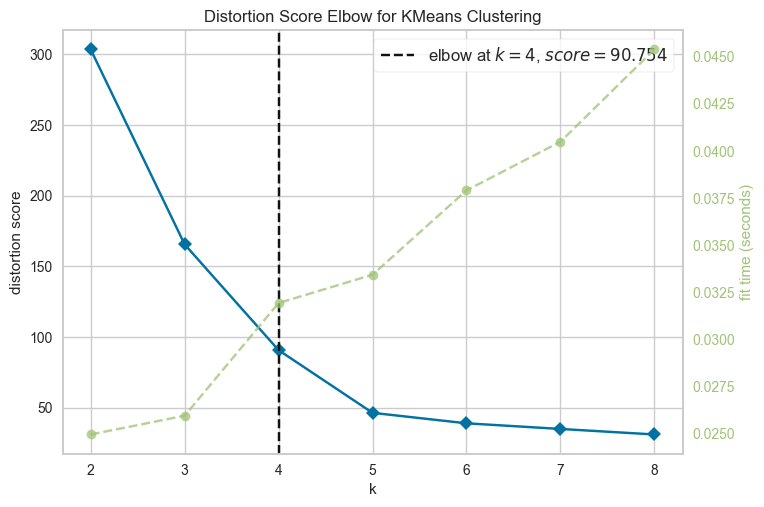

In [35]:
from yellowbrick.cluster import KElbowVisualizer

kM = KMeans(random_state=53)
visualizer = KElbowVisualizer(kM, k=(2,9))

visualizer.fit(df)   
visualizer.show(); # It shows 4 is good for n_cluster.

## Silhouette analysis

In [36]:
from sklearn.metrics import silhouette_score

In [38]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kM = KMeans(n_clusters=num_clusters, random_state=53)
    kM.fit(df)
    cluster_labels = kM.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}") # It says n_cluster 5 or 4 ideal.

For n_clusters=2, the silhouette score is 0.648063045534944
For n_clusters=3, the silhouette score is 0.5986694238664615
For n_clusters=4, the silhouette score is 0.6514181820684726
For n_clusters=5, the silhouette score is 0.7185436350184042
For n_clusters=6, the silhouette score is 0.580251618746234
For n_clusters=7, the silhouette score is 0.4764611534142053
For n_clusters=8, the silhouette score is 0.42729297812575917


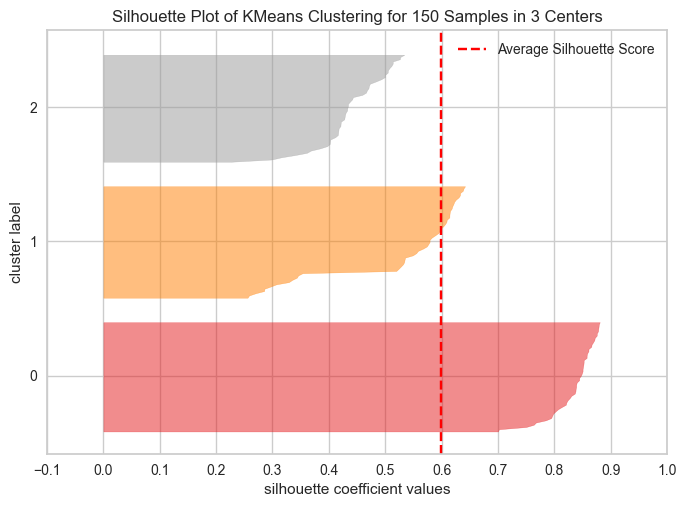

In [39]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_real = KMeans(n_clusters=3, random_state=53)
visualizer = SilhouetteVisualizer(model_real)

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.poof();

## Lets build the model based on the optimal number of clusters

In [40]:
model_real = KMeans(n_clusters =3, random_state=42)
model_real.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [43]:
model_real.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [47]:
df_copy['Predicted Class'] = model_real.labels_

In [48]:
df_copy

,sepal_length,sepal_width,petal_length,petal_width,species,Predicted Class
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [49]:
df_copy.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [50]:
df_copy['Predicted Class'].value_counts()

0    51
1    50
2    49
Name: Predicted Class, dtype: int64

In [58]:
df_copy.groupby(['species','Predicted Class']).count() # It whows setosa clearly clustered but versicolor and virginica failed so far...

sepal_length  sepal_width  petal_length  \
species    Predicted Class                                            
setosa     1                          50           50            50   
versicolor 0                          26           26            26   
           2                          24           24            24   
virginica  0                          25           25            25   
           2                          25           25            25   

                            petal_width  
species    Predicted Class               
setosa     1                         50  
versicolor 0                         26  
           2                         24  
virginica  0                         25  
           2                         25

In [59]:
ct = pd.crosstab(df_copy['Predicted Class'] , df_copy.species) # This is better way what I want above...
ct

species,setosa,versicolor,virginica
Predicted Class,,,
0,0,26,25
1,50,0,0
2,0,24,25


# Adjust Rand Score